# Exploring Movie Body Counts

**Author**: [Ramiro Gómez](http://ramiro.org/)

A look at movie body counts based on information from the Website [Movie Body Counts](http://www.moviebodycounts.com/).

## About the data source

Movie Body Counts is a forum where users collect on-screen body counts for a selection of films and the characters and actors who appear in these films. The dataset currently contains counts for 545 films from 1949 to 2013, which is a very small sample of all the films produced in this time frame.

To be counted a kill and/or dead body has to be visible on the screen, implied deaths like those died in the explosion of the Death Star are not counted. For more details on how counts should be conducted see [their guidelines](http://moviebodycounts.proboards.com/index.cgi?board=general&action=display&thread=6), the first one reads:

>The "body counts" for this site are mostly "on screen kills/deaths" or fatal/critical/mortal shots/hits of human, humanoid, or creatures (ie monsters, aliens, zombies.) The rule of thumb is "do they bleed" which will leave the concept of cyborgs somewhat open and decided per film. The human and creature counts should be separate. These will be added together for a final tally.

Apart from the small number of films in this dataset, we can safely assume a [selection bias](https://en.wikipedia.org/wiki/Selection_bias). So take this exploration with a grain of salt and don't generalize any of the results. This is mainly a demonstration of some of things you can to with the tools being used and a fun dataset to look at.

The [CSV dataset](http://figshare.com/articles/On_screen_movie_kill_counts_for_hundreds_of_films/889719) is kindly provided by [Randal Olson](http://www.randalolson.com/) ([@randal_olson](https://twitter.com/randal_olson)), who took the effort of collecting the death toll data from Movie Body Counts and added MPAA and IMDB ratings as well as film lengths.

## Import packages

To explore and visualize the data I'll be using several Python packages that greatly facilitate these tasks, namely: [NumPy](http://numpy.org/), [pandas](http://pandas.pydata.org/) and [matplotlib](http://matplotlib.org/).

In [1]:
%load_ext signature
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ramiro')

chartinfo = 'Author: Ramiro Gómez - ramiro.org • Data: Movie Body Counts - moviebodycounts.com'

## Load data and first look

We can directly download the CSV file from the Web and read it into a pandas [DataFrame](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html) object.

In [2]:
df = pd.read_csv('http://files.figshare.com/1332945/film_death_counts.csv')

To get a grasp of the data let's look at the first few lines of the CSV file.

In [3]:
df.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


This dataset looks pretty well suited for doing some explorations and visualizations. I'll rename some columns to have shorter and a little nicer labels later on.

In [4]:
df.columns = ['Film', 'Year', 'Body count', 'MPAA', 'Genre', 'Director', 'Minutes', u'IMDB']

Let's also add a `Film count` column to keep track of the number of films when grouping and the body count per minute.

In [5]:
df['Film count'] = 1
df['Body count/min'] = df['Body count'] / df['Minutes'].astype(float)
df.head()

,Film,Year,Body count,MPAA,Genre,Director,Minutes,IMDB,Film count,Body count/min
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3,1,0.059829
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6,1,0.469027
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0,1,2.120000
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6,1,0.592920
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7,1,5.128205


## Body counts over time

Next we look at how the number of body counts has evolved over the time frame covered by the dataset. To do so the `DataFrame` is grouped by year calculating the means, medians, and sums of the numeric columns. Also for a change print the last few records. 

In [6]:
group_year = df.groupby('Year').agg([np.mean, np.median, sum])
group_year.tail()

Body count                  Minutes                   IMDB         \
            mean median   sum        mean median   sum      mean median   
Year                                                                      
2007   85.312500   45.5  4095  114.062500  111.0  5475  6.829167   7.00   
2008   68.653846   37.0  1785  109.615385  108.5  2850  6.573077   6.65   
2009   55.000000   59.0   605  112.272727  110.0  1235  6.845455   6.60   
2010  129.750000  126.0   519  115.750000  111.0   463  7.250000   7.25   
2013  156.000000  156.0   156  119.000000  119.0   119  6.500000   6.50   

            Film count            Body count/min                       
        sum       mean median sum           mean    median        sum  
Year                                                                   
2007  327.8          1      1  48       0.749838  0.366966  35.992220  
2008  170.9          1      1  26       0.635468  0.371208  16.522174  
2009   75.3          1      1  11       0.518937  0.385621   5.708305  
2010   29.0          1      1   4       1.132110  1.005280   4.528441  
2013    6.5          1      1   1       1.310924  1.310924   1.310924

The `group_year` `DataFrame` now contains several columns, that are not useful, like the mean and median film count. We simply don't use them, but instead look at the film and body counts.

With matplotlib's `subplots` function multiple graphs can be combined into one graphic. This allows comparing several distributions that have differing scales, as is the case for the film, total and average body counts.

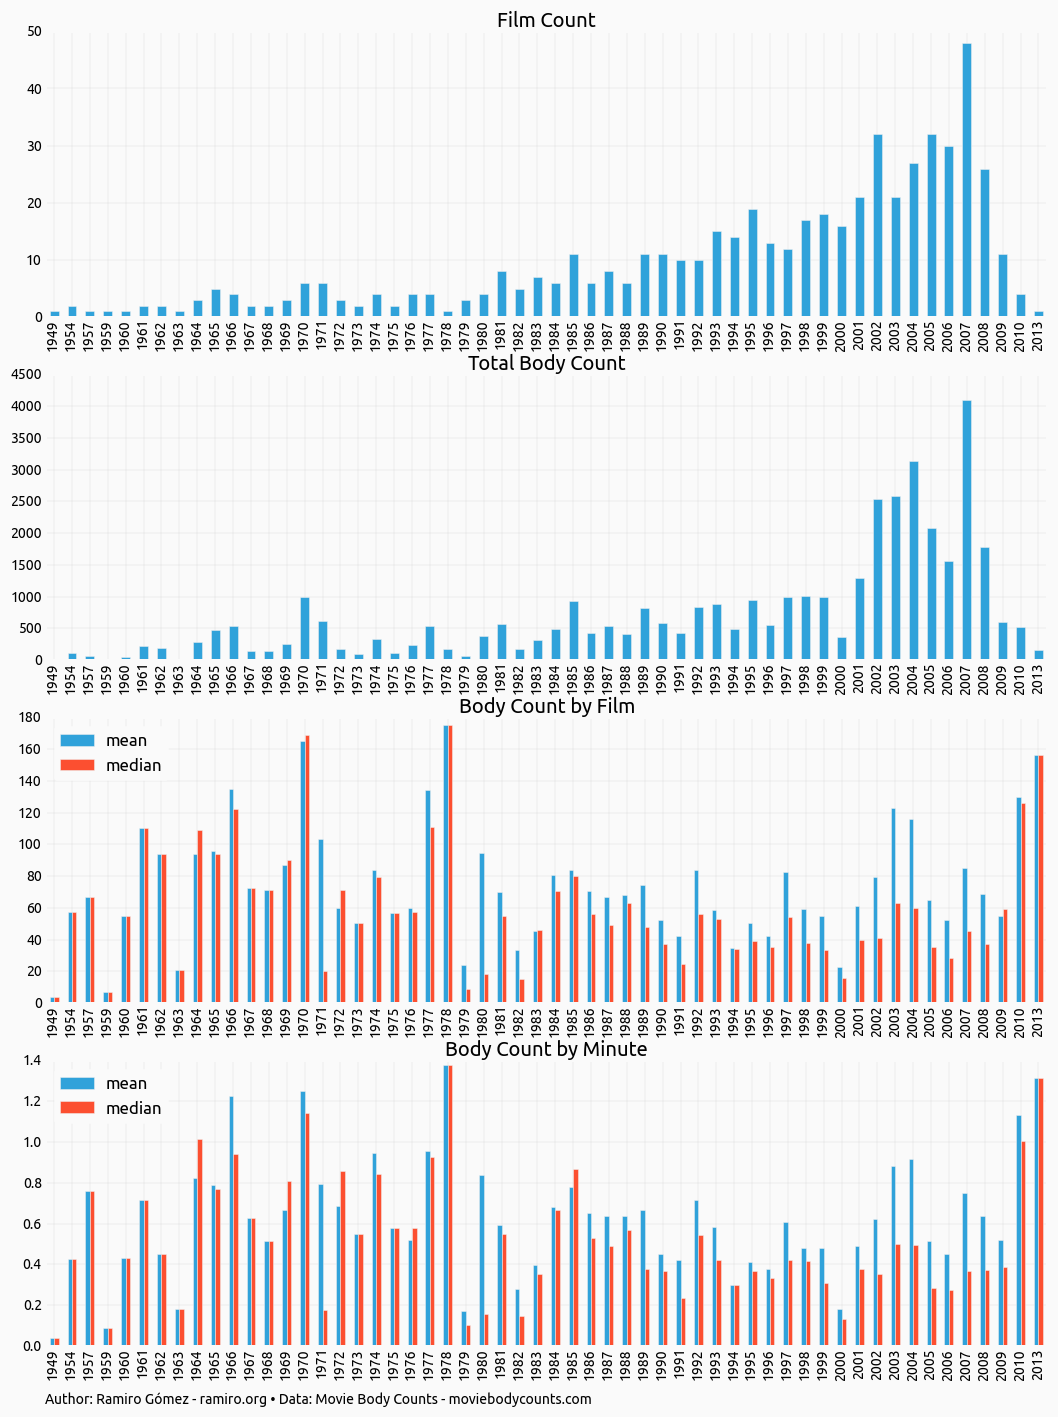

In [7]:
df_bc = pd.DataFrame({'mean': group_year['Body count']['mean'],
                      'median': group_year['Body count']['median']})

df_bc_min = pd.DataFrame({'mean': group_year['Body count/min']['mean'], 
                          'median': group_year['Body count/min']['median']})

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(16, 22))

group_year['Film count']['sum'].plot(kind='bar', ax=axes[0]); axes[0].set_title('Film Count')
group_year['Body count']['sum'].plot(kind='bar', ax=axes[1]); axes[1].set_title('Total Body Count')
df_bc.plot(kind='bar', ax=axes[2]); axes[2].set_title('Body Count by Film')
df_bc_min.plot(kind='bar', ax=axes[3]); axes[3].set_title('Body Count by Minute')

for i in range(4):
    axes[i].set_xlabel('', visible=False)
    
plt.annotate(chartinfo, xy=(0, -1.2), xycoords='axes fraction')

What we can safely say is, that most films in our dataset are from 2007. What this also shows quite well is the selection bias. There is only one film reviewed for each of the years 1978 and 2013, both have a pretty high body count.

## Most violent films

Now lets see which films have the highest total body counts and body counts per minute. This time we plot two horizontal bar charts next to each other, again using the `subplots` function.

Note that sorting is ascending by default, so we call `tail` to get the top 10 films each with the highest total body count and the highest body counts per minute. We could set `ascending` to `False` in the `sort` call and use `head`, but this would plot the highest value on the bottom. Also the y-axis labels of the right chart a printed on the right, so they don't overlap with the left one.

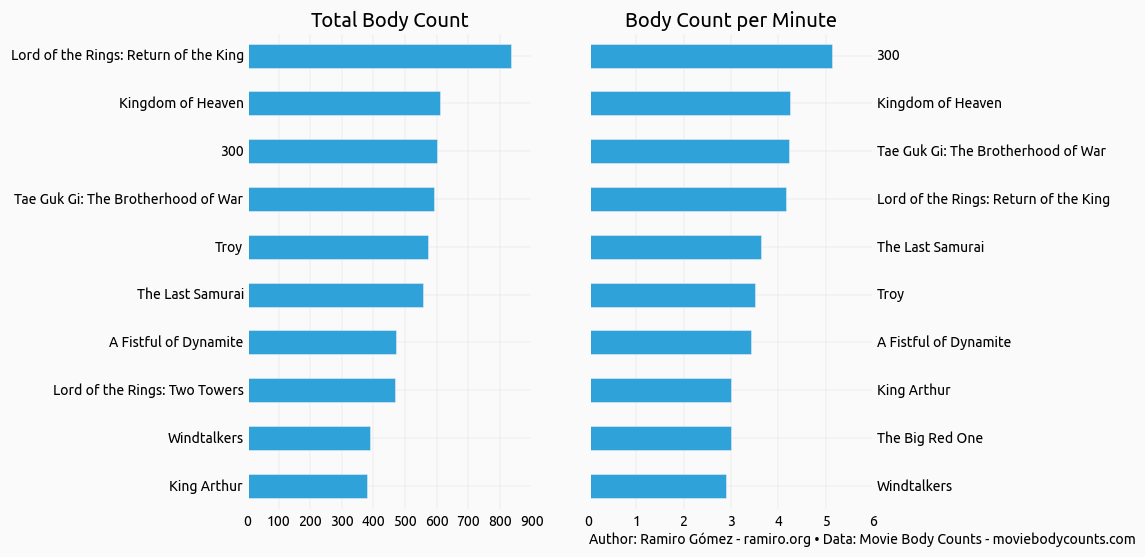

In [8]:
df_film = df.set_index('Film')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

bc = df_film.sort('Body count')['Body count'].tail(10)
bc.plot(kind='barh', ax=axes[0])
axes[0].set_title('Total Body Count')

bc_min = df_film.sort('Body count/min')['Body count/min'].tail(10)
bc_min.plot(kind='barh', ax=axes[1])
axes[1].set_title('Body Count per Minute')
axes[1].yaxis.set_ticks_position('right')

for i in range(2):
    axes[i].set_ylabel('', visible=False)
    
plt.annotate(chartinfo, xy=(0, -1.07), xycoords='axes fraction')

There is a considerable gap between **Lord of the Rings** and the runner-up **Kingdom of Heaven** in the left chart, but when you take runtime into account, the later is slightly more violent. Both of them are surpassed by **300** when one looks at deaths by minute, which shouldn't surprise anyone who saw it. Below you can see why.

In [4]:
from IPython.display import IFrame
IFrame('https://www.youtube-nocookie.com/embed/HdNn5TZu6R8', width=800, height=450)

## Most violent directors

Now let's look at directors. As you may have noticed above the `Genre` column can contain multiple values separated by `|` characters. This also applies to the `Director` column, here are some examples.



In [10]:
df[df['Director'].apply(lambda x: -1 != x.find('|'))].head()

,Film,Year,Body count,MPAA,Genre,Director,Minutes,IMDB,Film count,Body count/min
26,Aliens vs. Predator: Requiem,2007,5,R,Action|Horror|Sci-Fi|Thriller,Colin Strause|Greg Strause,94,4.7,1,0.053191
38,Aqua Teen Hunger Force Colon Movie Film for Th...,2007,67,R,Animation|Action|Adventure,Matt Maiellaro|Dave Willis,86,6.8,1,0.779070
46,Bangkok Dangerous,2008,38,R,Action|Crime|Thriller,Oxide Pang Chun|Danny Pang,99,5.4,1,0.383838
47,Barton Fink,1991,3,R,Drama|Mystery,Joel Coen|Ethan Coen,116,7.7,1,0.025862
83,City of God,2002,60,R,Crime|Drama,Fernando Meirelles|Katia Lund,130,8.7,1,0.461538


Since I want to group by directors later, I have to decide what to do with these multi-value instances. So what I'll do is create a new data frame with one new row for a single director and multiple new rows with the same count values for films that have more than one director. I also considered dividing the body counts by the number of directors, but decided against it.

The following function does this. I feel that there is a more elegant way with pandas, but it works for arbitrary columns.

In [11]:
def expand_col(df_src, col, sep='|'):
    di = {}
    idx = 0
    for i in df_src.iterrows():
        d = i[1]
        names = d[col].split(sep)
        for name in names:
            # operate on a copy to not overwrite previous director names
            c = d.copy()
            c[col] = name
            di[idx] = c
            idx += 1

    df_new = pd.DataFrame(di).transpose()
    # these two columns are not recognized as numeric
    df_new['Body count'] = df_new['Body count'].astype(float)
    df_new['Body count/min'] = df_new['Body count/min'].astype(float)
    
    return df_new

Now similar to the film ranking let's plot a director ranking.

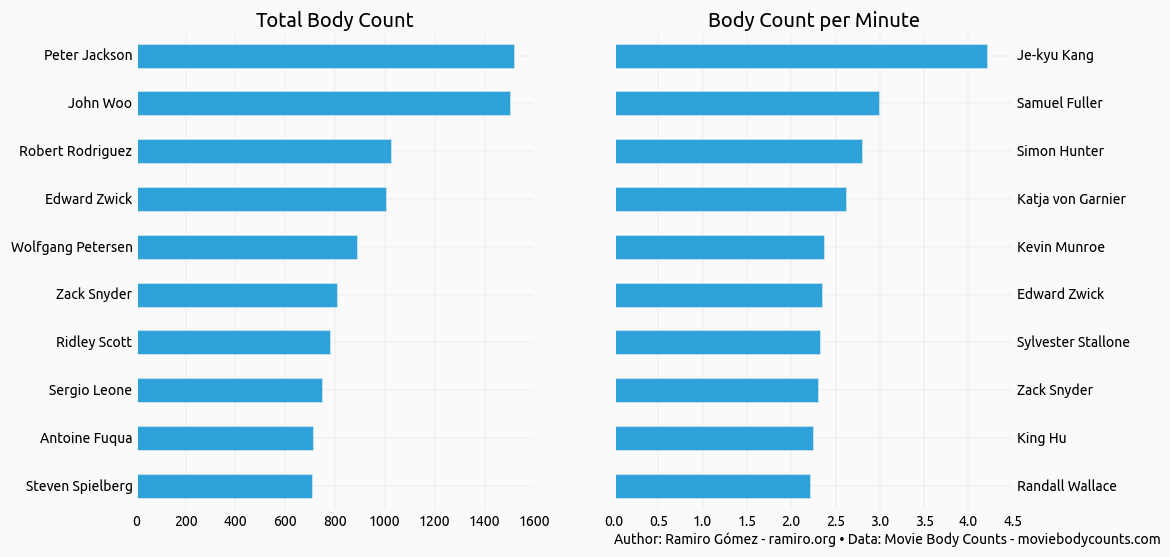

In [12]:
df_dir = expand_col(df, 'Director')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

bc_sum = df_dir.groupby('Director').sum().sort('Body count').tail(10)
bc_sum['Body count'].plot(kind='barh', ax=axes[0])
axes[0].set_title('Total Body Count')

bc_mean = df_dir.groupby('Director').agg(np.mean).sort('Body count/min').tail(10)
bc_mean['Body count/min'].plot(kind='barh', ax=axes[1])
axes[1].set_title('Body Count per Minute')
axes[1].yaxis.set_ticks_position('right')

for i in range(2):
    axes[i].set_ylabel('', visible=False)

plt.annotate(chartinfo, xy=(0, -1.07), xycoords='axes fraction')

## Body counts in film genres

As mentioned above `Genre` is a multi-value column too. So let's create a new data frame again, where each film can account for multiple genres and look at the frequency distribution of films by genre.

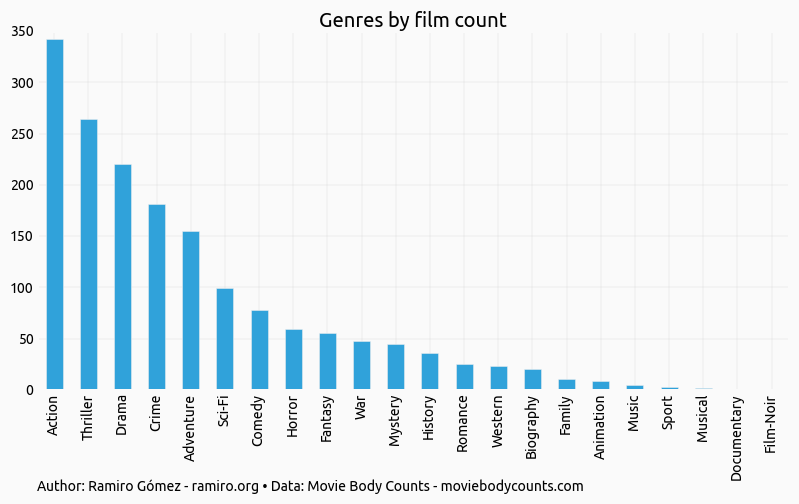

In [13]:
df_genre = expand_col(df, 'Genre')
df_genre['Genre'].value_counts().plot(kind='bar', figsize=(12, 6), title='Genres by film count')

plt.annotate(chartinfo, xy=(0, -1.28), xycoords='axes fraction')

Looking at the total body counts for genres doesn't make much sense since some genres occur much more frequently, instead let's see genres by body counts per minute.

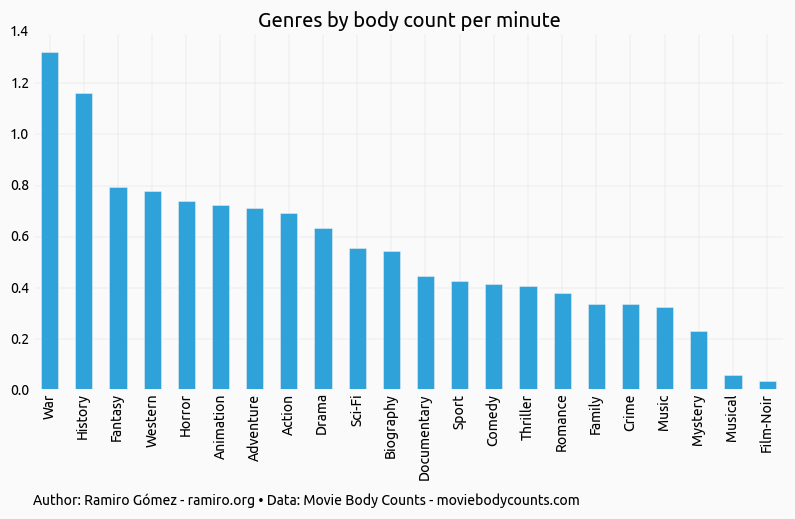

In [14]:
bc_mean = df_genre.groupby('Genre').agg(np.mean).sort('Body count/min', ascending=False)
ax = bc_mean['Body count/min'].plot(kind='bar', figsize=(12, 6), title='Genres by body count per minute')
ax.set_xlabel('', visible=False)
plt.annotate(chartinfo, xy=(0, -1.32), xycoords='axes fraction')

Not a huge surprise to see war movies on top, and since many of them are also classified as history movies this genre comes in 2nd place. Also several of the most deadly films are counted in these two genres, see some examples below.

In [15]:
df_genre[(df_genre['Genre'] == 'War') | (df_genre['Genre'] == 'History')].sort('Body count/min', ascending=False).head(20)

,Film,Year,Body count,MPAA,Genre,Director,Minutes,IMDB,Film count,Body count/min
14,300,2007,600,R,History,Zack Snyder,117,7.7,1,5.128205
15,300,2007,600,R,War,Zack Snyder,117,7.7,1,5.128205
668,Kingdom of Heaven,2005,610,R,History,Ridley Scott,144,7.1,1,4.236111
669,Kingdom of Heaven,2005,610,R,War,Ridley Scott,144,7.1,1,4.236111
1204,Tae Guk Gi: The Brotherhood of War,2004,590,R,War,Je-kyu Kang,140,8.1,1,4.214286
1388,The Last Samurai,2003,558,R,History,Edward Zwick,154,7.7,1,3.623377
1389,The Last Samurai,2003,558,R,War,Edward Zwick,154,7.7,1,3.623377
1254,The Big Red One,1980,338,R,War,Samuel Fuller,113,7.3,1,2.991150
1658,Windtalkers,2002,389,R,War,John Woo,134,5.9,1,2.902985
956,Rambo,2008,247,R,War,Sylvester Stallone,92,7.1,1,2.684783


## MPAA and IMDB Ratings

Finally let's look at the MPAA and IMDB ratings and how they relate to the movie body counts by creating two scatter plots.

Since MPAA ratings are not numeric, their values need to be mapped to numbers in some way to produce a scatter plot. We can use the `value_counts` method to get a sorted series of different MPPA ratings and their counts.

In [16]:
ratings = df['MPAA'].value_counts()
ratings

R           338
PG-13       118
PG           35
Unrated      28
Approved      9
M             5
GP            4
X             4
G             3
NR            1
dtype: int64

Next the different rating names are used as keys of a dictionary mapped to a list of integers of the same length. This dictionary is then used to map the different rating values of the MPAA column to the corresponding integers.

In [17]:
rating_names = ratings.index
rating_index = range(len(rating_names))
rating_map = dict(zip(rating_names, rating_index))
mpaa = df['MPAA'].apply(lambda x: rating_map[x])

Now we can create a scatter plot with the following few lines of code, where the MPAA ratings are show on the x-axis, the body counts per minute on the y-axis and the circle sizes are determined by the total body counts of the movies.

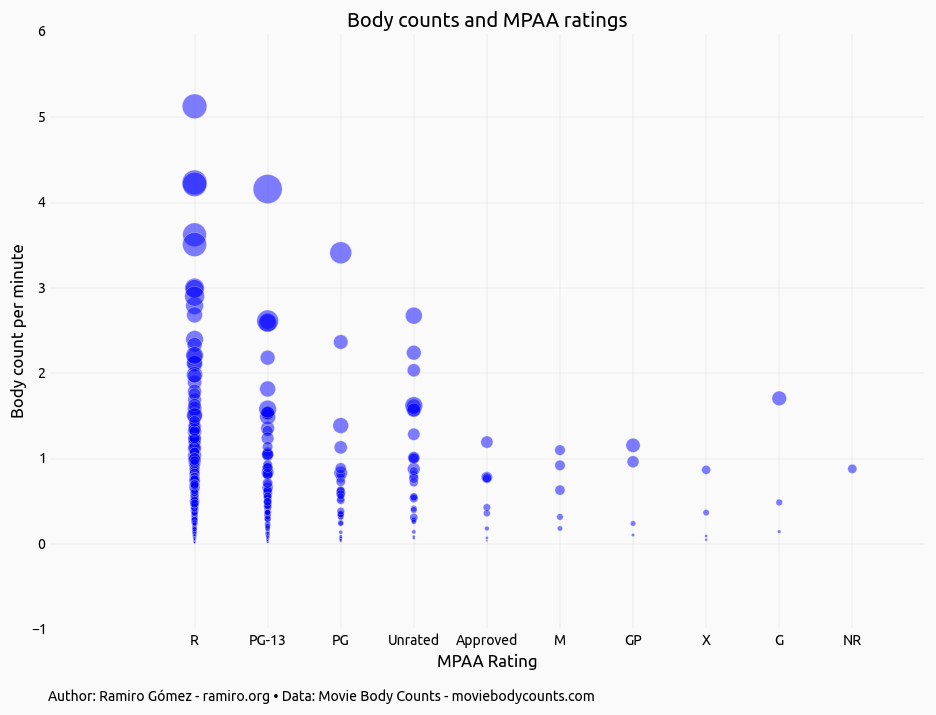

In [18]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(mpaa, df['Body count/min'], s=df['Body count'], alpha=.5)
ax.set_title('Body counts and MPAA ratings')
ax.set_xlabel('MPAA Rating')
ax.set_xticks(rating_index)
ax.set_xticklabels(rating_names)
ax.set_ylabel('Body count per minute')
plt.annotate(chartinfo, xy=(0, -1.12), xycoords='axes fraction')

One of the things this diagram shows is that the film with highest body count and also a pretty high body count/min is rated PG-13. Looking back at the film rankings above, we know that it is **Lord of the Rings: Return of the King**, but wouldn't it be nice to have labels for at least some of the circles? Yes, so annotating graphs will be demonstrated in the next scatter plot, which shows body counts and IMDB ratings.

To not mess up the graph, only the 3 movies with the highest body count will be labeled. They go into a list of lists called `annotations`, where the inner lists are made up of the label text and the x and the y positions of the labels. Then after setting up the basic plot the annotations are added to it in a loop. The label positions can be adjusted with the `xytext`, `textcoords`, `ha`, and `va` arguments to the `annotate` method. 

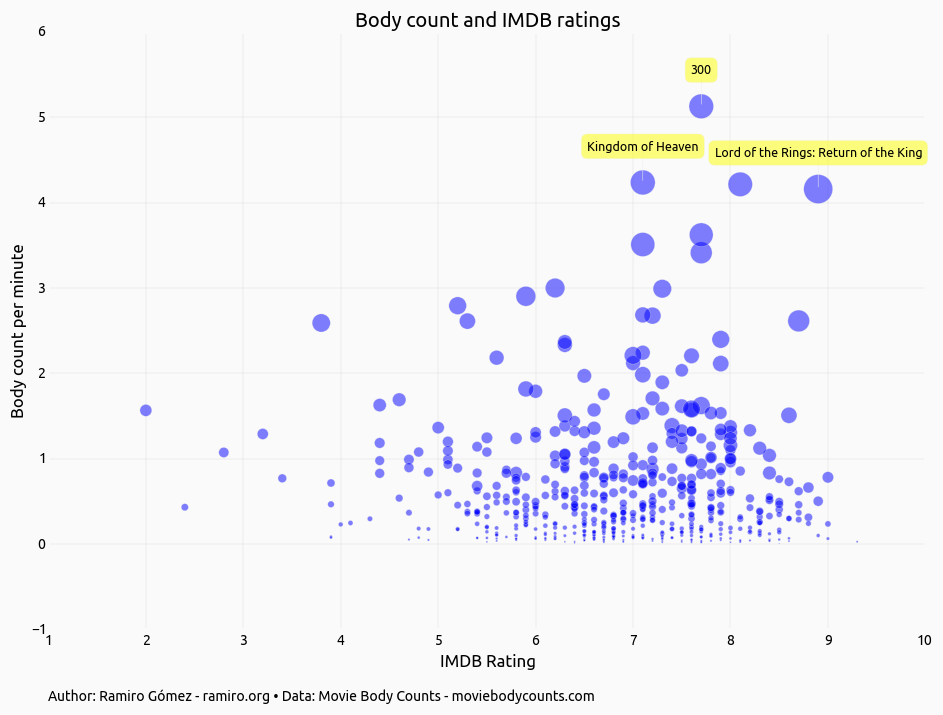

In [19]:
bc_top = df.sort('Body count', ascending=False)[:3]
annotations = []
for r in bc_top.iterrows():
    annotations.append([r[1]['Film'], r[1]['IMDB'], r[1]['Body count/min']])

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(df['IMDB'], df['Body count/min'], s=df['Body count'], alpha=.5)
ax.set_title('Body count and IMDB ratings')
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Body count per minute')

for annotation, x, y in annotations:
    plt.annotate(
        annotation,
        xy=(x, y),
        xytext=(0, 30),
        textcoords='offset points',
        ha='center',
        va='bottom',
        size=12.5,
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='-'))

plt.annotate(chartinfo, xy=(0, -1.12), xycoords='axes fraction')

## Summary

This notebook demonstrates some of the basic features of pandas, NumPy and matplotlib for processing, exploring and visualizing data.

Due to the dataset's limitations mentioned in the introduction, I refrained from interpreting the results too much. The focus of this notebook is how you can use these tools to get to know a dataset. They offer many more possibilities and advanced features are all free and open source. I can only recommend using them and will certainly keep on doing so myself.

In [20]:
%signature